<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT24/blob/Widen00-Lab2/Lab2/Widen00_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2: Iterative Methods**
**Joel Widén**

# **Abstract**

This report is about iterative methods for solving linear and non linear scalar and vector systems. The goal is to implement iterative algorithms to solve these. The methods used are Jacobi iteration, Gauss-Seidel iteration and Newton's method for scalar functions. These methods all perform as expected and converge to the correct solutions.

#**About the code**


This is a report in the course DD2363 Methods in Scientific Computing. The author of this file is Joel Widén, joelwid@kth.se.

# **Set up environment**

This block is run to set up the environment.

In [2]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *

#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

Numbered algorithms, equations and chapter references used in this report is from the DD2363 course book Methods in Computational Science by Johan Hoffman if not stated otherwise.

Iterative methods are in the linear case used to increase the speed of getting a solution often requiring less steps than direct methods to get a good solution. Especially for sparse matrices this is very useful. For the nonlinear case we can also use the same kind of method as for the linear case but as for linear equations have a unique solution it is not guaranteed for nonlinear equations. Nonlinear equations can have multiple solutions which make the algorithms different from the linear case.

This report is done by completing assignments included in the second programming assignment of the course DD2363. The mandatory assignments are listed below:

**Assignment 1:** Function: Jacobi iteration for Ax=b

* *Input:* matrix $A$, vector $b$
* *Output:* vector $x$
* *Test:* convergence of residual $|| Ax-b ||$, $|| x-y ||$ for manufactured/exact solution $y$

**Assignment 2:** Function: Gauss-Seidel iteration for $Ax=b$

* *Input:* matrix $A$, vector $b$
* *Output:* vector $x$
* *Test:* convergence of residual $|| Ax-b ||$, $|| x-y ||$ for manufactured/exact solution $y$

**Assignment 3:** Function: Newton's method for scalar nonlinear equation $f(x)=0$

* *Input:* scalar function $f(x)$
* *Output:* real number $x$
* *Test:* convergence of residual $|f(x)|$, $|x-y|$ for manufactured/exact solution $y$



# **Method**

The following block will set up the matrices used in assignment 1 and assignment 2. These matrices are square and made diagonally dominant for the Jacobi and Gauss-Seidel iterations to converge properly.



In [3]:
# Run this block to set up matrix for gauss seidel and jacobi iteration
n = 10
m = n
# Should be diagonally dominant
# Matrix is randomized with zeroes and ones
# The maximum non diagonal sum in each row is n * 1 - 1
max_non_diag = (n * 1) - 1
# This means we must add an identity matrix with at least n * 1 - 1
# on the diagonal according to example 7.6
A = np.random.randint(2, size=(m, n)) + max_non_diag * np.eye(n)
y = np.random.randint(3, size=n)
b = A.dot(y)

print("Input matrix = ", A)
print("Manufactured solution y = ", y)
print("b = ", b)

Input matrix =  [[ 9.  1.  0.  0.  1.  0.  0.  0.  1.  1.]
 [ 1.  9.  0.  1.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  9.  0.  1.  1.  0.  1.  0.  1.]
 [ 1.  1.  1.  9.  0.  1.  1.  0.  0.  1.]
 [ 1.  0.  0.  1.  9.  1.  1.  0.  1.  0.]
 [ 1.  1.  0.  1.  1. 10.  0.  1.  0.  1.]
 [ 0.  1.  1.  0.  0.  1.  9.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1. 10.  1.  0.]
 [ 0.  1.  1.  0.  1.  1.  1.  0.  9.  1.]
 [ 1.  1.  1.  0.  1.  0.  1.  1.  1. 10.]]
Manufactured solution y =  [0 1 0 0 0 0 1 1 1 0]
b =  [ 2. 10.  1.  2.  2.  2. 11. 12. 11.  4.]


**Assignment 1**

The Jacobi iteration was constructed using example 7.8 from the book. This method is based on splitting up the matrix $A$ into two parts $A = A_1 + A_2$ where $A_1 = D$ which is a matrix of the same shape but containing only the diagonals of $A$ and $A_2 = A - D$. Since Jacobi iteration is a form of fixed point iteration it is shown to converge if $||I - D^{-1}A|| < 1$ according to chapter 7.7. This is checked before the iteration to make sure it will converge.

In [4]:
# Assignment 1
# Jacobi iteration for Ax = b
# Jacobi iteration is based on splitting the A = A_1 + A_2 where
# A_1 = D = diag(A) and A_2 = A - D
# Example 7.8 used from the book

def jacobi_iteration(A, b):
  m, n = np.shape(A)
  x = np.zeros(n)
  k = 20
  x_matrix = np.zeros((k, len(x)))
  r_vec = np.zeros(k)
  for iter in range(k):
    x_k = x
    for i in range(0, n):
      sum = 0
      for j in range(0, n):
        if j == i:
          sum = sum
        else:
          sum += A[i][j]*x_k[j]
      x[i] = 1/A[i][i] * (b[i] - sum)
    x_matrix[iter,:] = x
    r = np.linalg.norm(A.dot(x)-b)
    r_vec[iter] = r
  return(x, x_matrix, r_vec)

D = np.diag(np.diag(A))
D_inv = np.linalg.inv(D)
Mj = np.eye(n) - np.matmul(D_inv, A)
conv_criterion = np.linalg.norm(Mj)

#Check the convergence criterion
print("Convergence criterion = ", conv_criterion)

x, x_matrix, r = jacobi_iteration(A, b)

error_matrix = x_matrix - y
error_vec = np.zeros_like(r)
i = 0
for error in error_matrix:
  error_vec[i] = np.linalg.norm(error)
  i += 1

#print("Error from manufactured solution y = ",error_vec)
#print("Result x = ", x)
#print("Result residuals r = ", r)

error_vec_jacobi = error_vec
residuals_jacobi = r

Convergence criterion =  0.7598732837831631


**Assignment 2**

This assignment uses the Gauss-Seidel iterations which is similar to the jacobi iteration but it is base on splitting the matrix $A$ into two terms as with the Jacobi iteration but instead $A_1 = L$ where $L$ is a under triangular matrix and $A_2 = A - L$. The convergence criteria for this method is $||I - L^{-1}A|| < 1$. This method is based on example 7.9 from the book.

In [5]:
# Assignment 2
# Based on splitting into A_1 = L and A_2 = A - L
# Example 7.9 used from the book

def gauss_seidel_iteration(A, b):
  m, n = np.shape(A)
  x = np.zeros(n)
  k = 20
  x_matrix = np.zeros((k, len(x)))
  r_vec = np.zeros(k)
  for iter in range(k):
    for i in range(0, n):
      sum_1 = 0
      sum_2 = 0
      for j in range(0, i):
        sum_1 += A[i][j]*x[j]
      for j in range(i+1, n):
        sum_2 += A[i][j]*x[j]
      x[i] = 1/A[i][i] * (b[i] - sum_1 - sum_2)
    x_matrix[iter,:] = x
    r = np.linalg.norm(A.dot(x)-b)
    r_vec[iter] = r
  return(x, x_matrix, r_vec)

L = np.tril(A)
L_inv = np.linalg.inv(L)
Mj = np.eye(n) - np.matmul(L_inv, A)
conv_criterion = np.linalg.norm(Mj)

#Checking the convergence criterion
print("Convergence criterion = ", conv_criterion)

x, x_matrix, r_vec = gauss_seidel_iteration(A, b)

error_matrix = x_matrix - y
error_vec = np.zeros_like(r)
i = 0
for error in error_matrix:
  error_vec[i] = np.linalg.norm(error)
  i += 1

#print("Error from manufactured solution y = ",error_vec)
#print("Result x = ", x)
#print("Result residuals r = ", r)

error_vec_gauss_seidel = error_vec
residuals_gauss_seidel = r


Convergence criterion =  0.49427139332215136


**Assignment 3**

This assignment is using algorithm 8.2 from the book to construct the function for Newton's method for scalar functions. The function is chosen to be a polynomial with 2 roots according to the function ``` f(x)```. The derivative that is used in the newton function is approximated using a central difference.

In [6]:
#Assignment 3
#Newtons method
#Newtons method based on algorithm 8.2

def f(x):
  #Chosen solutions of polynomial
  roots = [2, -1]
  fx = 1
  #Generate polynomial
  for root in roots:
    fx = fx * (x - root)
  return fx

def derivative(f, x):
  h = 0.0001
  #Using central difference
  df = (f(x+h)-f(x-h))/(2*h)
  return df

#Newtons method according to algorithm 8.2
def newtons_method_scalar(f, x0):
  x = x0
  TOL = 10**-8
  residuals = np.zeros(0)
  x_vec = np.zeros(0)
  while abs(f(x)) > TOL:
    df = derivative(f, x)
    x = x - f(x)/df
    residuals = np.append(residuals, [abs(f(x))])
    x_vec = np.append(x_vec, [x])
  return(x, residuals, x_vec)


x0 = -0.5
x, residuals, x_vec = newtons_method_scalar(f, x0)


error_newton = x_vec - (-1)
error_vec = np.zeros_like(error_newton)
i = 0
for error in error_newton:
  error_vec[i] = abs(error)
  i += 1

#print("Solution x = ", x)
#print("Error convergence = ", error_vec)
#print("Residuals = ", residuals)

errors_newton = error_vec
residuals_newton = residuals


# **Results**

All of the assignments are tested in terms of their residuals and error. By saving how these change with each iteration they can be plotted as a function of numbers of iterations.

For all assignments the error and residual decreases with each iteration which means that there is a convergence to the correct answer.

<Figure size 640x480 with 0 Axes>

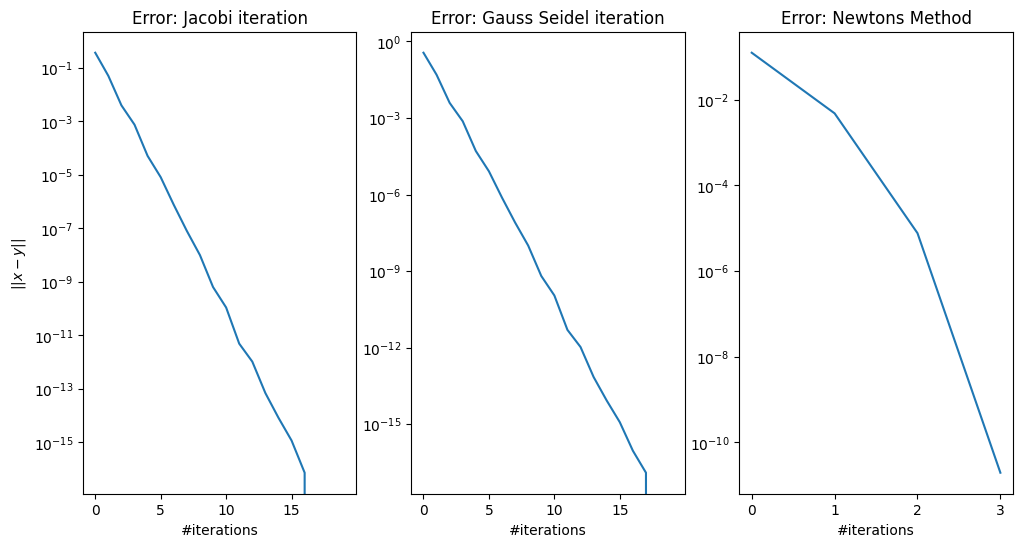

<Figure size 640x480 with 0 Axes>

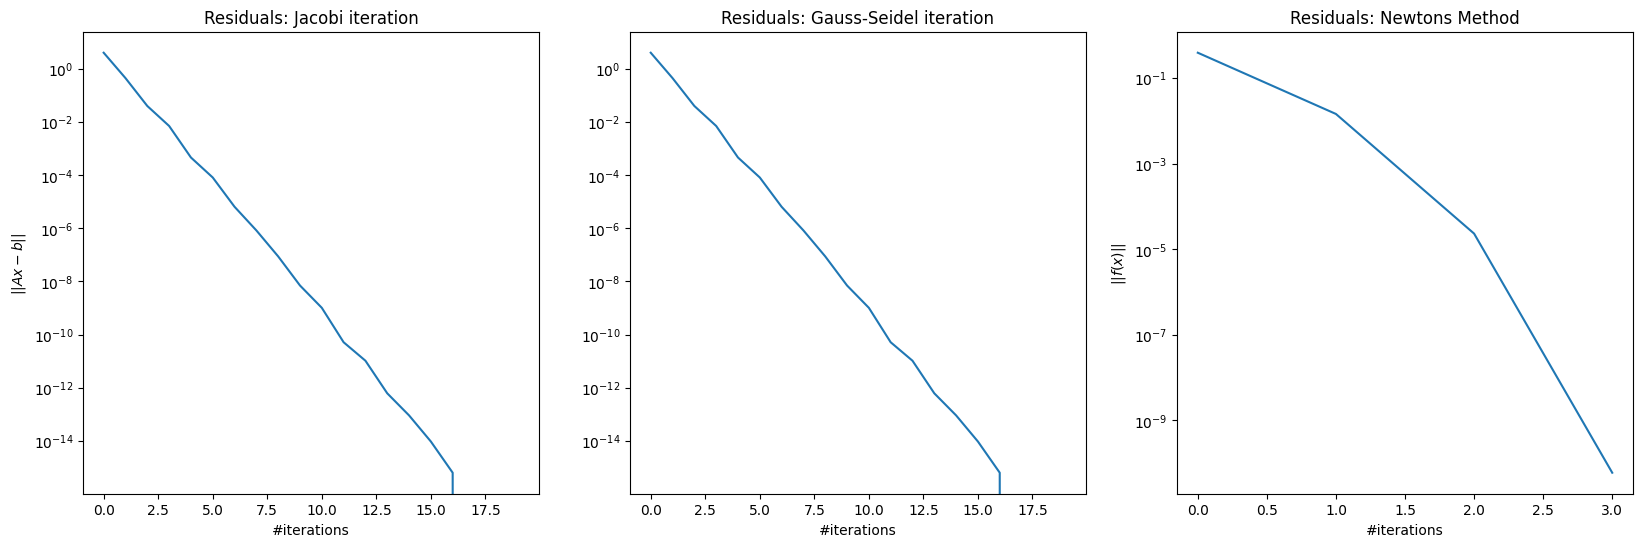

In [7]:
# Plot results

# Error plots
plt.figure(1)
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.semilogy(error_vec_jacobi)
plt.title("Error: Jacobi iteration")
plt.ylabel("$||x-y||$")
plt.xlabel("#iterations")
plt.subplot(132)
plt.semilogy(error_vec_gauss_seidel)
plt.title("Error: Gauss Seidel iteration")
plt.xlabel("#iterations")
plt.subplot(133)
plt.semilogy(errors_newton)
plt.title("Error: Newtons Method")
plt.xlabel("#iterations")
plt.show()

# Residual plots
plt.figure(2)
plt.tight_layout()
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.semilogy(residuals_jacobi)
plt.title("Residuals: Jacobi iteration")
plt.ylabel("$||Ax-b||$")
plt.xlabel("#iterations")
plt.subplot(132)
plt.semilogy(residuals_gauss_seidel)
plt.title("Residuals: Gauss-Seidel iteration")
plt.xlabel("#iterations")
plt.subplot(133)
plt.semilogy(residuals_newton)
plt.title("Residuals: Newtons Method")
plt.ylabel("$||f(x)||$")
plt.xlabel("#iterations")
plt.show()

# **Discussion**

Both Jacobi iteration and the Gauss-Seidel iteration seems to be convering at about the same speed. Newton's method is converging a lot quicker than both the Jacobi and Gauss-Seidel iterations.

The Jacobi iteration is disadvantaged in some way when it comes to data size as it is necessary to store all the $x^k$-values in a array for each iteration. In the Gauss-seidel iteration there is only need for one array which can hold both $k$ and $k+1$ values as it is iterating over each $i$. This is making the Gauss-Seidel method more storage efficient. The drawback of this is that the gauss seidel calculations needs to be performed in the same order and is not as easily parallelized as the Jacobi iteration.

The Jacobi and Gauss-Seidel methods are also restricted in terms of what non-conditioned matrices are going to guarantee convergence.

Newton's method do not have this kind of limitation but is also limited in that it is not clear cut from the start which solution the iteration will converge to. An initial guess needs to be near the actual solution that is wanted.